# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year than the southern hemisphere. This may be due to the tilt of the earth.
* There doesn't appear to be a strong relationship between latitude and humidity, however while most degrees of latitude have varying degrees of humidity, the area along the equator at 0 degrees latitude has much smaller variability and sits pretty consistelty at nearly 100% humidity. 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind, and a rather extreme outlier at just over 40 degrees of latitude with close to 50 mph winds.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:5])

604
['okha', 'rostusa', 'saldanha', 'souillac', 'hithadhoo']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print(
"""
Beginning Data Retrieval
-----------------------------""")

settings = {"units": "metric", "appid": api_key}
weather_data = []

for city in cities: 
    try: 
        weather_data.append(owm.get_current(city, **settings))
        print(f"Processing Record {cities.index(city)} | {city}")
    except urllib.error.HTTPError: 
        print(f"{city} not found. Skipping...")

print(
"""
-----------------------------
Data Retrieval Complete
-----------------------------""")


Beginning Data Retrieval
-----------------------------
Processing Record 0 | okha
rostusa not found. Skipping...
Processing Record 2 | saldanha
Processing Record 3 | souillac
Processing Record 4 | hithadhoo
Processing Record 5 | lagoa
palabuhanratu not found. Skipping...
Processing Record 7 | vila velha
nguiu not found. Skipping...
Processing Record 9 | hilo
Processing Record 10 | marsh harbour
Processing Record 11 | mataura
Processing Record 12 | vanavara
Processing Record 13 | puerto colombia
Processing Record 14 | lima
Processing Record 15 | barrow
kamenskoye not found. Skipping...
Processing Record 17 | cabo san lucas
belushya guba not found. Skipping...
Processing Record 19 | naze
Processing Record 20 | gaeta
Processing Record 21 | rawson
Processing Record 22 | ilulissat
taolanaro not found. Skipping...
Processing Record 24 | bluff
Processing Record 25 | sitka
Processing Record 26 | broome
Processing Record 27 | mola di bari
Processing Record 28 | belaya gora
qabis not found. Ski

Processing Record 246 | lawton
Processing Record 247 | touros
Processing Record 248 | hasaki
Processing Record 249 | berlevag
Processing Record 250 | fortuna
Processing Record 251 | mayya
Processing Record 252 | tasiilaq
Processing Record 253 | sur
Processing Record 254 | mineiros
Processing Record 255 | amahai
Processing Record 256 | yumen
Processing Record 257 | cherskiy
Processing Record 258 | petatlan
Processing Record 259 | hammerfest
Processing Record 260 | lompoc
Processing Record 261 | kawalu
Processing Record 262 | olavarria
Processing Record 263 | bethel
Processing Record 264 | bambous virieux
Processing Record 265 | aksarka
Processing Record 266 | dehloran
Processing Record 267 | okhotsk
Processing Record 268 | aranos
Processing Record 269 | saint-pierre
Processing Record 270 | sao filipe
Processing Record 271 | bubaque
Processing Record 272 | yorosso
Processing Record 273 | vostok
Processing Record 274 | torbay
Processing Record 275 | paita
Processing Record 276 | ouadda
ba

Processing Record 493 | glenluce
Processing Record 494 | miri
Processing Record 495 | vila do maio
Processing Record 496 | tres arroyos
Processing Record 497 | samarai
el faiyum not found. Skipping...
Processing Record 499 | yangambi
Processing Record 500 | kavaratti
Processing Record 501 | sheffield
Processing Record 502 | canoinhas
shchelyayur not found. Skipping...
Processing Record 504 | sabha
Processing Record 505 | whitehorse
Processing Record 506 | nola
bargal not found. Skipping...
Processing Record 508 | katete
Processing Record 509 | bajil
Processing Record 510 | san blas
Processing Record 511 | kangaatsiaq
ondorhaan not found. Skipping...
Processing Record 513 | northam
Processing Record 514 | nemuro
Processing Record 515 | alofi
Processing Record 516 | adrar
Processing Record 517 | blagoyevo
Processing Record 518 | kaeo
Processing Record 519 | mongoumba
Processing Record 520 | roald
Processing Record 521 | guarapari
Processing Record 522 | bolobo
Processing Record 523 | brn

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
summary = ["coord.lon", "coord.lat","main.temp", "main.humidity", "clouds.all", "wind.speed"]
data = [response(*summary) for response in weather_data]
print(len(data))
print(len(weather_data))
cities_2 = [response("name") for response in weather_data]
len(cities_2)
weather_data_df = pd.DataFrame(data, index=cities_2)
weather_data_df.head()

543
543


,0,1,2,3,4,5
Okha,142.95,53.59,-4.09,100,32,4.32
Saldanha,-6.55,41.42,5.31,88,32,0.77
Souillac,-0.60,45.60,11.07,93,0,2.10
Hithadhoo,73.08,-0.60,27.96,100,64,3.77
Lagoa,-8.45,37.14,11.89,87,0,2.60


In [5]:
column_names = ["Longitude", "Latitude", "Temperature", "Humidity", "% Cloudiness", "Wind Speed"]
weather_data_df = pd.DataFrame(data, index=cities_2, columns=column_names)
weather_data_df.head()
weather_data_df.to_csv("Weather_Data.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

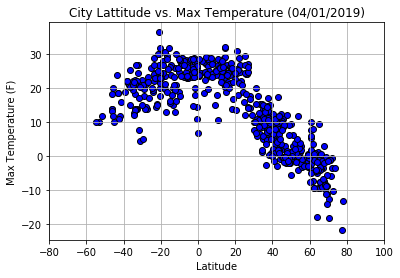

In [10]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], marker="o", color="b", edgecolor="black")
plt.grid()
plt.title("City Lattitude vs. Max Temperature (04/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80, 100)
plt.savefig("City_Lat_vs_Max_Temp.png")



#### Latitude vs. Humidity Plot

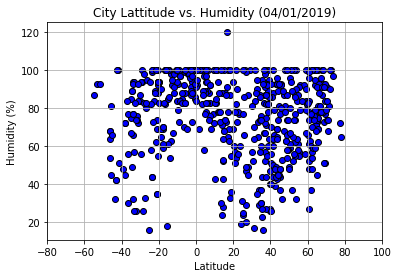

In [11]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o", color="b", edgecolor="black")
plt.grid()
plt.title("City Lattitude vs. Humidity (04/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80, 100)
plt.savefig("Lat_vs_Humidity.png")


#### Latitude vs. Cloudiness Plot

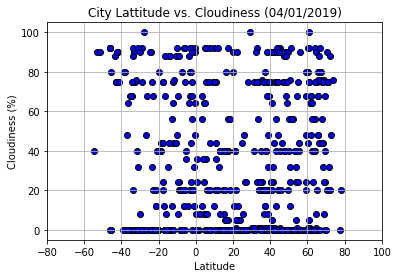

In [12]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["% Cloudiness"], marker="o", color="b", edgecolor="black")
plt.grid()
plt.title("City Lattitude vs. Cloudiness (04/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80, 100)
plt.savefig("Lat_vs_Cloudiness.png")


#### Latitude vs. Wind Speed Plot

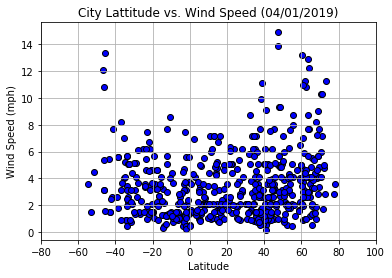

In [13]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o", color="b", edgecolor="black")
plt.grid()
plt.title("City Lattitude vs. Wind Speed (04/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80, 100)
plt.savefig("Lat_vs_Wind_Speed.png")
